# Exoplanets
</font><br>
_prepared by Muhammad 'Izzat bin Mohd Zubir_
<br>
##  What is exoplanet?
The universe is full of mysteries. From planets, to galaxies, there are many questions that we have yet to find the answer. Why is the universe dark? How big is the universe? How many galaxies are there? Are aliens out there? 
In this notebook, we will look into the study of exoplanets.
Let us embark on a journey exploring the secrets of the universe.
<img src="https://exoplanets.nasa.gov/system/internal_resources/details/original/877_Kepler-186f_social.jpg"
     alt="Exoplanet"
     style="width: 500px;" />


In [20]:
#We import packages for our app!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
from IPython import display #unused package. Future update perhaps?
from IPython.display import HTML
from IPython.display import IFrame
from IPython.display import Image
from time import sleep #unused
from matplotlib.animation import FuncAnimation #unused. Still learning about this package
from random import randrange #unused might be useful if user struggles to pick any random number?
%matplotlib inline

planets = pd.read_csv("exoplanet.csv") #read the data. Make sure the csv file is in the same folder as this python file!
#planets.set_index('loc_rowid', inplace=True)

In [21]:
#Dictionary #Renaming columns to a more meaningful columns
planets.rename(columns={'pl_name':'Planet_Name',
                        'hostname':'Host_Star',
                        'sy_snum':'Number of Stars',
                        'sy_pnum':'Number of Planets',
                        'disc_year':'Discovery Year',
                        'disc_facility':'Discovery_Facility',
                        'pl_orbper':'Orbital_Period(Years)',
                        'pl_orbeccen':'Eccentricity',
                        'st_spectype':'Spectral_Type',
                        'st_teff':'Stellar_Effective_Temperature(K)',
                        'st_mass':'Stellar_Mass(Mo)',
                        'rastr':'RA',
                        'ra':'RA_deg',
                        'decstr':'Dec_Sexadecimals',
                        'st_rad':'Stellar_Radius',
                        'sy_dist':'Distance_pc',
                        'sy_gaiamag':'Gaia_Magnitude',
                        'dec':'Dec'
                       }, inplace = True)

In [22]:
#Dropping columns unrelated to the program. #Cleaning the data from unused columns. There's plenty of data here removed! You might find it useful.
planets.drop(columns=['pl_radeerr1',
                      'pl_radeerr2',
                      'pl_radelim',
                      'pl_radj',
                      'pl_radjerr1',
                      'pl_radjerr2',
                      'pl_radjlim',
                      'pl_rade',
                     'pl_orbeccenerr1',
                      'pl_orbeccenerr2',
                      'st_tefferr1',
                      'st_tefferr2',
                      'st_tefflim',
                      'st_raderr1',
                      'st_raderr2',
                      'st_radlim',
                      'st_masserr1',
                      'st_masserr2',
                      'st_masslim',
                      'sy_disterr1',
                      'sy_disterr2',
                      'sy_gaiamagerr2',
                      'sy_gaiamagerr1',
                     'pl_orbpererr1',
                      'pl_eqt',
                      'RA_deg',
                      'Dec_Sexadecimals',
                      'pl_eqterr1',
                      'pl_eqterr2',
                      'pl_eqtlim',
                      'pl_orbpererr2',
                      'pl_orbperlim',
                      'pl_orbsmax',
                      'pl_orbsmaxerr1',
                      'pl_orbsmaxerr2',
                      'pl_orbsmaxlim',
                      'pl_orbeccenlim',], inplace=True)

In [23]:
# Youtube video on exoplanet. This is to introduce the user with exoplanet. Interesting yeah?
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/EUU0-ZpFoK4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [24]:
#Filling in empty elements. Empty elements can cause errors in our codes! Let's clean'em up!
nan_dict_fill = {('Orbital_Period(Years)','Distance_pc','Eccentricity','Stellar_Radius ','Stellar_Mass(Mo)'):'Data Not Available',
                  ('Spectral_Type','Stellar_Effective_Temperature(K)','Gaia_Magnitude'):'Insufficient Data'} 
# somehow, we cannot use fillna with the dictionary above. Any ideas? 
# We replace all null elements with Data unavailable
planets.fillna(value= 'Data Unavailable', inplace = False)

planets.rename_axis('Index', inplace = True) #Renaming the index. We are not replacing it. 
planets.head()

,Planet_Name,Host_Star,Number of Stars,Number of Planets,discoverymethod,Discovery Year,Discovery_Facility,Orbital_Period(Years),Eccentricity,Spectral_Type,Stellar_Effective_Temperature(K),Stellar_Radius,Stellar_Mass(Mo),RA,Dec,Distance_pc,Gaia_Magnitude
Index,,,,,,,,,,,,,,,,,
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,326.03000,0.231,G8 III,4742.0,19.00,2.70,12h20m42.91s,17.793252,93.1846,4.44038
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.21997,0.080,K4 III,4213.0,29.79,2.78,15h17m05.90s,71.823943,125.3210,4.56216
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,185.84000,0.000,K0 III,4813.0,11.00,2.20,23h31m17.80s,39.235837,75.4392,4.91781
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,1773.40002,0.370,K0 V,5338.0,0.93,0.90,16h10m24.50s,43.816362,17.9323,6.38300
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,798.50000,0.680,G3 V,5750.0,1.13,1.08,19h41m51.75s,50.516824,21.1397,6.06428


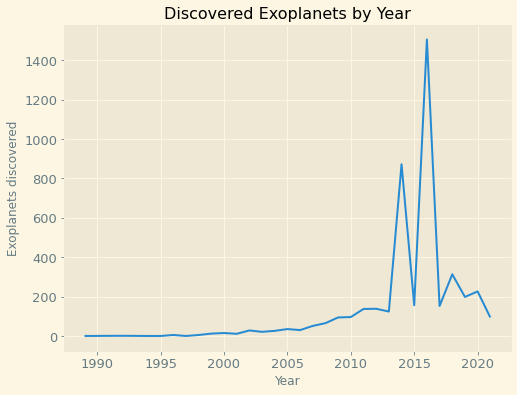

In [25]:
plt.style.use('Solarize_Light2') #Theme of the plot
plt.rcParams['figure.figsize'] = (8, 6) #some scaling of the graph
plt.rcParams['font.size'] = 13 #pretty straightforward
plt.title('Discovered Exoplanets by Year') 
plt.xlabel("Year")
plt.ylabel("Exoplanets discovered")

# Which year has the most discovered exoplanets?
output = planets['Discovery Year'].value_counts().sort_index().plot() #default plot is line graph



In [26]:
#Count the number of exoplanets discovered in certain periods of years
def count_exoplanet_year():
    #user inputs initial and final year
    print("Let's find out how many exoplanets we have discovered!")
    while True: #We loop through until correct inputs are entered
        try: #try/except to catch error
            inp_initial_year = int(input("Initial Year: ")) #inputs from user
            inp_final_year = int(input("Final Year: "))
            totl = int(planets[(planets['Discovery Year']>=inp_initial_year)&(planets['Discovery Year']<=inp_final_year)].count()[['Discovery Year']])
            if inp_initial_year==inp_final_year: # This is for single year
                print(f"Total exoplanets discovered in {inp_initial_year} is {totl}")
                break
            else:
                print(f"Total exoplanets discovered between {inp_initial_year} and {inp_final_year} is {totl}")
                break
        except Exception as err:
            print(f"There is an error: {type(err).__name__} with exception {err.args}. Please try again")
#Retrieve informations about a particular planet
def information_exoplanet():
    try: #We'll do a try/except error again in case the user does a mistake in the input
        num_pl = int(input("Enter any number between 0 to 4437: ")) #accept input from user
        y = list(planets.loc[num_pl]) #we create a list for the user-selected planet
        sun_temp = 5778 #sun's temperature in Kelvin
        ly_pc_conv = y[15]*3.24 #converting pc to ly
        print(f"My name is {y[0]}") 
        print(f"I was discovered in {y[5]} by {y[6]}.")
        #compare planets with Earth
        if y[3]>1: 
            print(f"I have {y[3]} siblings of planets. You have 7 other planets!")
        else:
            print(f"I have no sibling planets :(")
         #compare star's temperature
        if y[10] > sun_temp:
            diff_temp = int(y[10]) - sun_temp
            print(f"My host star is very hot!. It's temperature is {diff_temp}°C hotter than your sun.")
        elif y[10] < sun_temp:
            diff_temp = sun_temp - int(y[10])
            print(f"My host star is not so hot. It's temperature is {diff_temp}°C colder than your sun.")
        else:
            print("There's no data about my host star's temperature")
        # compare orbital period
        if y[7] > 365:
            print(f"A year for me is longer than yours by {int(y[7]) - 365} days")
        elif y[7] < 365:
            print(f"A year for me is shorter than yours by {365 - int(y[7])} days")
        else: 
            print("There's no data on my orbital period")
        # distance to the planet
        print(f"I am {round(ly_pc_conv)} light years away from you!")
        # amount of host stars
        if y[2] == 1:
            print("I orbit a single star, like your Earth does!")
        elif y[2]>1:
            print(f"I orbit {y[2]} stars! There would be {y[2]} sunrise and sunset everyday here!")

        return
    except:
        print("There's an error. Please try calling the function again")
        
# get information about the exoplanet by giving the name first
def exoplanet_name(name):
        return planets[planets['Planet_Name']==str(name)].head(1)



## Discovered Exoplanets by year

The line graph above demonstrates the number of exoplanet discovered per year. 
The first official exoplanet was discovered in 1992, which is PSR B1257+12 c by Aleksander Wolszczan and Dale Frail. You can look up the information about this planet using exoplanet_name function. As you can see, this planet orbits a pulsar, which means that it is pretty much unbearable for any living organism.

### Nobel Prize worthy
On 6 October 1995, Michel Mayor and Didier Queloz of the University of Geneva announced the first definitive detection of an exoplanet orbiting a main-sequence star, nearby G-type star 51 Pegasi. This planet is 51 Peg b (Look it up!). Both of these astronomers won the Nobel Prize in Physics 2019. What an achievement!
<img src="https://pbs.twimg.com/media/EGWO9CPWkAUZXdW.jpg"
     alt="Nobel Prize"
     style="width: 500px;" />




### The Kepler Space Telescope
In 2009, Kepler Space Telescope, a dedicated space telescope to probe exoplanets was launched. The name of this telescope was taken from the German Astronomer, Johannes Kepler who discovered 3 laws regarding planetary motions. This began its operation in 2009 and operated for almost a decade until it was retired in 2018. How many exoplanets was discovered by this telescope? Let's find out below!

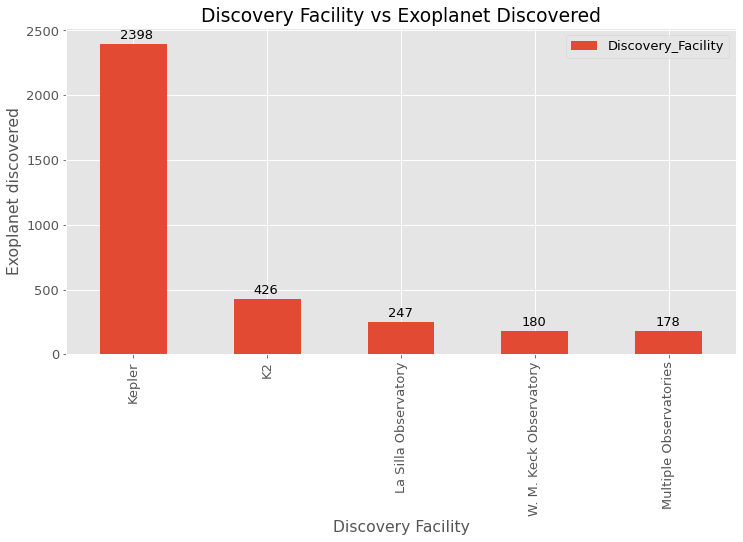

In [27]:
#Top 5 facilities
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 13
plt.xlabel("Discovery Facility")
plt.ylabel("Exoplanet discovered")
plt.title('Discovery Facility vs Exoplanet Discovered')

#i gives the count of y
#v gives the value of y
y = list(planets['Discovery_Facility'].value_counts())
y_5 = y[0:5] #creates new list of y, having only the top 5 elements
for i, v in enumerate(y_5):

    plt.text(i-0.10, v + 40, str(v))


ax = planets['Discovery_Facility'].value_counts().head().plot(kind='bar', grid = True, legend = True)


### Discovery Facility 

Aha! Kepler Space Telescope discovered 2398 exoplanets! That's almost 2 thousand more exoplanets than the 2nd facility, K2. 
Interestingly, K2 is actually using Kepler Space Telescope too. In 2012, some crucial components on the telescope failed, leading to the end of its primary mission. However, in 2013, NASA came up with a plan to use Kepler's remaining assets to search through all possible candidates of exoplanets.

The K2 extension mission lasted from 2013 until it ran out of fuel in 2018. Still, it managed to discover 426 exoplanets. The rest of the observatories in the list are ground based observatories.

Watch the video below on Kepler Space Telescope's contributions to our understanding of the life beyond Earth.

In [28]:
#
HTML('<iframe width="500" height="315" src="https://www.youtube.com/embed/_V7J05fK5e0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\Users\Izzat\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Discovery Methods Part 1
As of July 2021, more than 4 thousand exoplanets have been discovered. We may ask a fundamental question about these discoveries:
### How are exoplanets discovered? 
Our first guess would be to look it up through a telescope like we do when we found out about Mars. However, these exoplanets are tiny, and much much much further away than Mars is. So, it is improbable (but not impossible) to discover exoplanets directly throuch a telescope. Then, how do we discover them? 
There are 10 methods that we used to discover exoplanets. Let's find out!

</figure>
<img src="https://sciworthy.com/wp-content/uploads/2018/05/An_exoplanet_seen_from_its_moon_artists_impression-1024x639.jpg"
     alt="Exoplanet"
     style="width: 500px;">
</figure>



In [29]:
#A class of exoplanet's discovery methods
class discovery_methods:
    def __init__(self,methods):
        self.methods = methods
        
        #show picture of the discovery methods
    def animate(self):
        if self.methods == 'Radial Velocity':
            image = Image(url='https://thumbs.gfycat.com/BruisedTartIsabellinewheatear-size_restricted.gif')
        elif self.methods == 'Astrometry':
            image = Image(url='http://www.daviddarling.info/images/radial_velocity_method.gif')
        elif self.methods == 'Eclipse Timing Variation' or self.methods == 'Transit Timing Variation':
            image = Image(url='https://i1.wp.com/www.hughosborn.co.uk/wp-content/uploads/2015/03/TTVsGif.gif')
        elif self.methods == 'Transit':
            image = Image(url='https://i.gifer.com/AcWZ.gif')
        elif self.methods == 'Pulsar Timing':
            image = Image(url='https://media4.giphy.com/media/l3dj5M4YLaFww31V6/giphy.gif')
        elif self.methods == 'Imaging':
            image = Image(url='https://upload.wikimedia.org/wikipedia/commons/a/a2/HR_8799_Orbiting_Exoplanets.gif')
        elif self.methods == 'Orbital Brightness Modulation':
            image = Image(url='https://www.gizmodo.com.au/content/uploads/sites/2/2015/10/23/1485277964742453283.gif')
        elif self.methods == 'Microlensing':
            image = Image(url='https://i.makeagif.com/media/10-18-2017/cCu0hZ.gif')
        else:
            image = Image(url='http://i.imgur.com/2sRiyE1.gif')    
        return image
        
     # short description on the methods. Somehow this function doesn't print. Any guesses?   
    def description(self):
        if self.methods == 'Radial Velocity':
            print = ("Measurement from the star's doppler shift")
        elif self.methods == 'Astrometry':
            print = ("Measurement from the actual movement of the star")
        elif self.methods == 'Eclipse Timing Variation' or self.methods == 'Transit Timing Variation':
            print = ("Measurement from the repeated period of transit or eclipse")
        elif self.methods == 'Transit':
            print = ("Measurement from the dip in brightness")
        elif self.methods == 'Pulsar Timing':
            print = ("Measurement from the pulse irregularities of the pulsar")
        elif self.methods == 'Imaging':
            print = ("Direct imaging of the planets")
        elif self.methods == 'Orbital Brightness Modulation':
            print = ("Measurement of the change in brightness of the host star due to gravitational pull from the planet")
        elif self.methods == 'Microlensing':
            print = ("Direct imaging of the planets")
        else:
            print = ("Measurement from the protoplanetary disk")
            


In [30]:
l = discovery_methods('Radial Velocity')

In [31]:
l.animate()

In [32]:
l.description()

In [33]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ahX_0XHp1vM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Discovery Methods Part 2

Now we have known a little bit about the discovery methods of exoplanets, the next task is to analyse which methods give the best result so far. Let's run the code below.



<AxesSubplot:title={'center':'Discovery Method vs Exoplanet Discovered'}, xlabel='Discovery Method', ylabel='Exoplanet discovered'>

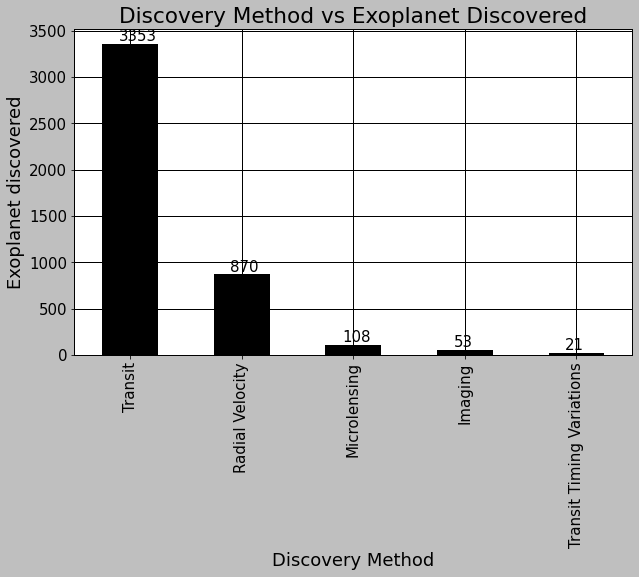

In [34]:
#Top 5 discovery methods
plt.style.use('grayscale')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 15
plt.xlabel("Discovery Method")
plt.ylabel("Exoplanet discovered")
plt.title('Discovery Method vs Exoplanet Discovered')

y = list(planets['discoverymethod'].value_counts())
y_5 = y[0:5] #creates new list of y, having only the top 5 elements
for i, v in enumerate(y_5):
    plt.text(i-0.10, v + 35, str(v))

planets['discoverymethod'].value_counts().head().plot(kind='bar')

## Distance and Magnitude (Brightness)

Woah! Exoplanet is a very interesting object to study! 
However, they are not easy to find because of the following two main reasons:
1. Distance
2. Brightness

### Distance

Can you guess the distance between the Earth to the Sun? 
.
.
.
It is 150 million kilometers away! That is really far away!
How about the nearest star to our Sun, Proxima Centauri?
That would be 37 trillion kilometers! 
#### Light years and Parsec
When it comes to astronomical scale, we no longer use kilometers as the unit for distance since our brain cannot really differentiate between a trillion and a trillion trillion. Therefore, we normally use light years as our unit for distance. 

A light year is the distance covered by light(photon) in a year which is equivalent to 9.46 trillion kilometers (a trillion has 12 zeros behind it).
Another unit for distance that is common in literature is parsec. A parsec (pc) is the distance when an object has a parallax angle of one arcsecond from the Earth. One parsec is equivalent to 3.26 light years. 
</figure>
<img src="https://www.fizzics.org/wp-content/uploads/2018/12/The-parsec.png"
     alt="Exoplanet"
     style="width: 500px;">
</figure> 

### Magnitude (Brightness)

We see an object when light from the object enters our eyes. When we look at the night sky, we see stars because they shine through a physical process known as nuclear fusion. How do we differentiate between the brightness of astronomical objects? 

Astronomers use magnitude scale to describe an object brightness. This scale is reverse logarithmic: The bigger the magnitude, the dimmer the object and a difference of 1 in magnitude scale is 2.51 times in actual brightness. From our experience, we know that the further away a light source is, the fainter it is. So, how about exoplanets? Do they follow this rule? Let's find out!

</figure>
<img src="https://earthsky.org/upl/2017/03/apparent-magnitude-scale-e1490133992818.jpg"
     alt="Exoplanet"
     style="width: 500px;">
</figure> 



Text(0.5, 1.0, 'Gaia Magnitude vs Distance(pc)')

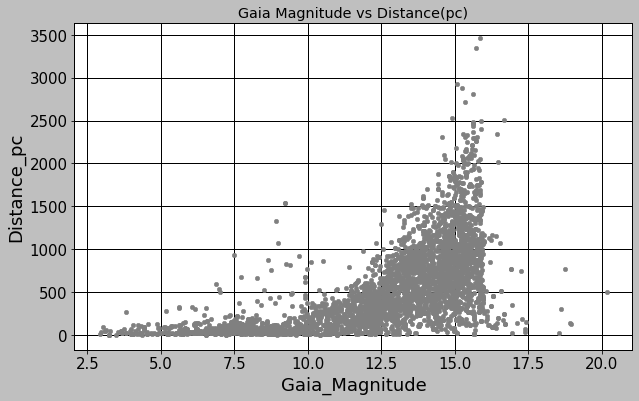

In [35]:
#What is the  relationship between distance and brightness of the exoplanets?
planets[['Distance_pc','Gaia_Magnitude']].dropna().plot(kind = 'scatter', x='Gaia_Magnitude', y='Distance_pc')
plt.style.use('ggplot')
plt.title('Gaia Magnitude vs Distance(pc)')

## Relationship between Magnitude and distance

As can be seen from the scatter plot, the further away a star, the larger its magnitude is. 
Remember, magnitude is a reversed logarithmic scale which means that the higher the number, the dimmer the star is. 

So, what do you think of exoplanets? Interesting right? 

A closely related field to exoplanet is astrobiology. This field studies the possibility of extraterrestrial life on the exoplanets. Are we alone in the universe? Has alien visited us before? 

These are some intersting questions that are still unanswered...

In [36]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/3HN_zx4JJfM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\Users\Izzat\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
